# pyiron_workflow

## Define workflow in pyiron_workflow

In [1]:
from python_workflow_definition.pyiron_workflow import write_workflow_json

In [2]:
from pyiron_workflow import Workflow, to_function_node

In [3]:
from workflow import (
    get_prod_and_div as _get_prod_and_div, 
    get_sum as _get_sum,
    get_square as _get_square,
)

In [ ]:
workflow_json_filename = "pyiron_workflow_arithmetic.json"

In [4]:
get_prod_and_div = to_function_node("get_prod_and_div", _get_prod_and_div, "get_prod_and_div")
get_sum = to_function_node("get_sum", _get_sum, "get_sum")
get_square = to_function_node("get_square", _get_square, "get_square")

In [5]:
wf = Workflow("my_workflow")

In [6]:
wf.x = 1
wf.y = 2
wf.prod_and_div = get_prod_and_div(x=wf.x, y=wf.y)
wf.tmp_sum = get_sum(x=wf.prod_and_div["prod"], y=wf.prod_and_div["div"])
wf.square_result = get_square(x=wf.tmp_sum)

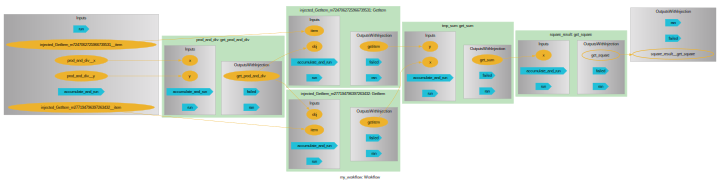

In [7]:
wf.draw(size=(10,10))

In [8]:
write_workflow_json(graph_as_dict=wf.graph_as_dict, file_name=workflow_json_filename)

In [9]:
!cat workflow.json

{
  "version": "0.1.0",
  "nodes": [
    {
      "id": 0,
      "type": "function",
      "value": "workflow.get_prod_and_div"
    },
    {
      "id": 1,
      "type": "function",
      "value": "workflow.get_sum"
    },
    {
      "id": 2,
      "type": "function",
      "value": "workflow.get_square"
    },
    {
      "id": 3,
      "type": "input",
      "name": "x",
      "value": 1
    },
    {
      "id": 4,
      "type": "input",
      "name": "y",
      "value": 2
    },
    {
      "id": 5,
      "type": "output",
      "name": "result"
    }
  ],
  "edges": [
    {
      "target": 1,
      "targetPort": "y",
      "source": 0,
      "sourcePort": "div"
    },
    {
      "target": 1,
      "targetPort": "x",
      "source": 0,
      "sourcePort": "prod"
    },
    {
      "target": 2,
      "targetPort": "x",
      "source": 1,
      "sourcePort": "get_sum"
    },
    {
      "target": 0,
      "targetPort": "x",
      "source": 3,
      "sourcePort": null
    },
    {
   

## Load Workflow with aiida

In [ ]:
from aiida import load_profile

load_profile()

In [ ]:
from python_workflow_definition.aiida import load_workflow_json

In [ ]:
wg = load_workflow_json(file_name=workflow_json_filename)
wg

In [ ]:
wg.run()

# Load Workflow with jobflow

In [ ]:
from python_workflow_definition.jobflow import load_workflow_json

In [ ]:
from jobflow.managers.local import run_locally

In [ ]:
flow = load_workflow_json(file_name=workflow_json_filename)

In [ ]:
result = run_locally(flow)
result

# Load Workflow with pyiron_base

In [ ]:
from python_workflow_definition.pyiron_base import load_workflow_json

In [ ]:
delayed_object_lst = load_workflow_json(file_name=workflow_json_filename)
delayed_object_lst[-1].draw()

In [ ]:
delayed_object_lst[-1].pull()